In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 19 columns):
id                     43431 non-null int64
user_id                43431 non-null int64
vehicle_model_id       43431 non-null int64
package_id             7550 non-null float64
travel_type_id         43431 non-null int64
from_area_id           43343 non-null float64
to_area_id             34293 non-null float64
from_city_id           16345 non-null float64
to_city_id             1588 non-null float64
from_date              43431 non-null object
to_date                25541 non-null object
online_booking         43431 non-null int64
mobile_site_booking    43431 non-null int64
booking_created        43431 non-null object
from_lat               43338 non-null float64
from_long              43338 non-null float64
to_lat                 34293 non-null float64
to_long                34293 non-null float64
Car_Cancellation       43431 non-null int64
dtypes: float64(9), int64(7), object

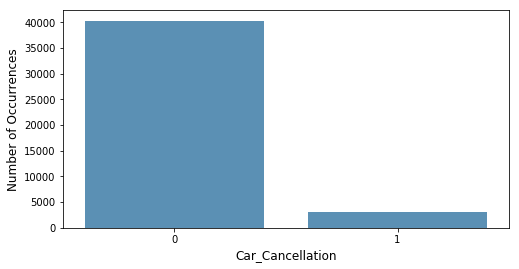

In [5]:
int_level = data['Car_Cancellation'].value_counts()
color = sns.color_palette()
plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Car_Cancellation', fontsize=12)
plt.show()

In [6]:
data['Car_Cancellation'].value_counts()

0    40299
1     3132
Name: Car_Cancellation, dtype: int64

In [7]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)


,Total,Percent
to_city_id,41843,0.963436
package_id,35881,0.826161
from_city_id,27086,0.623656
to_date,17890,0.411918
to_lat,9138,0.210403
to_long,9138,0.210403
to_area_id,9138,0.210403
from_long,93,0.002141
from_lat,93,0.002141
from_area_id,88,0.002026


### Preferably to remove that variable whose missing percent is greater than 40% here.
#### i.e ['to_city_id' ,'package_id' ,'from_city_id', 'to_date']

In [8]:
data.drop(['to_city_id' ,'package_id' ,'from_city_id' ,'to_date'],axis=1,inplace=True)

In [9]:
data['to_lat'].fillna(data['to_lat'].mean(),inplace=True)
data['to_long'].fillna(data['to_long'].mean(),inplace=True)
data['from_long'].fillna(data['from_long'].mean(),inplace=True)
data['from_lat'].fillna(data['from_lat'].mean(),inplace=True)

In [10]:
data.head()

,id,user_id,vehicle_model_id,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,2,83.0,448.0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,2,1010.0,540.0,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,2,1301.0,1034.0,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,2,768.0,398.0,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,2,1365.0,849.0,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0


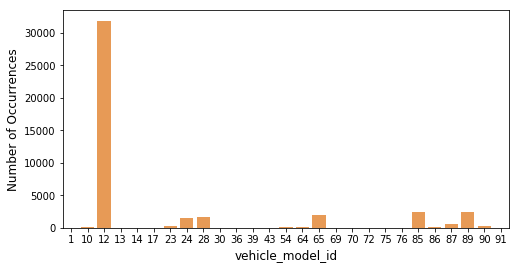

In [11]:
cnt_srs = data['vehicle_model_id'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('vehicle_model_id', fontsize=12)
plt.show()

### Vehicle_model_id 12 used highly all over the year 2013.

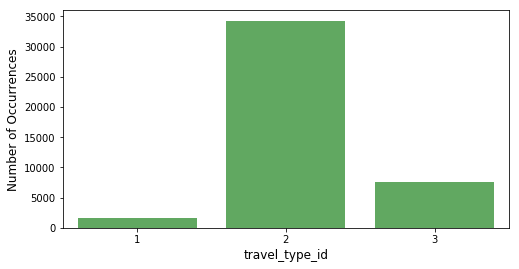

In [12]:
cnt_srs = data['travel_type_id'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('travel_type_id', fontsize=12)
plt.show()

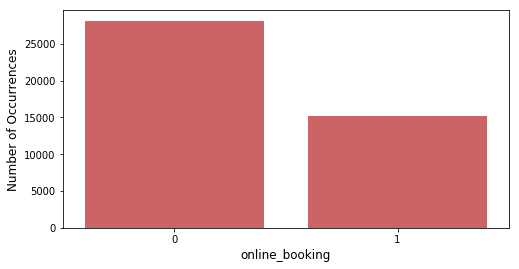

In [13]:
cnt_srs = data['online_booking'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('online_booking', fontsize=12)
plt.show()

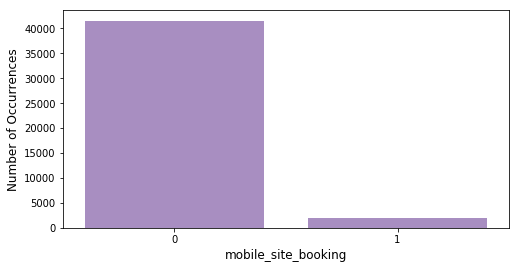

In [14]:
cnt_srs = data['mobile_site_booking'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[4])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('mobile_site_booking', fontsize=12)
plt.show()

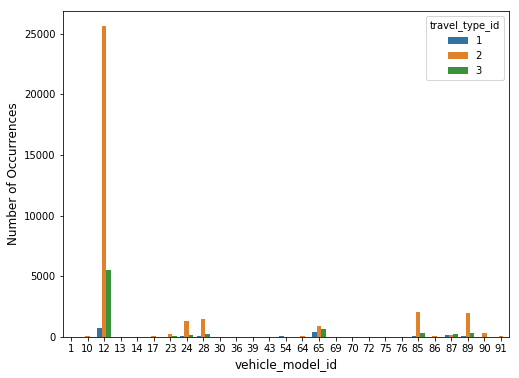

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(x='vehicle_model_id', hue='travel_type_id', data=data)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('vehicle_model_id', fontsize=12)
plt.show()

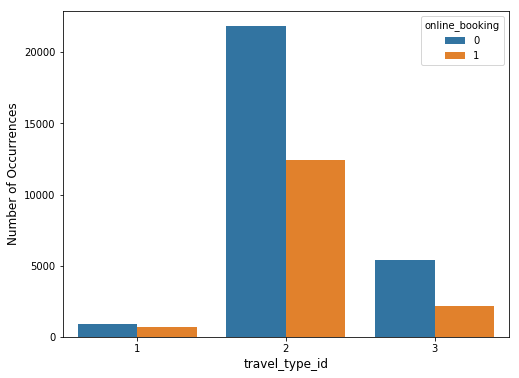

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(x='travel_type_id', hue='online_booking', data=data)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('travel_type_id', fontsize=12)
plt.show()

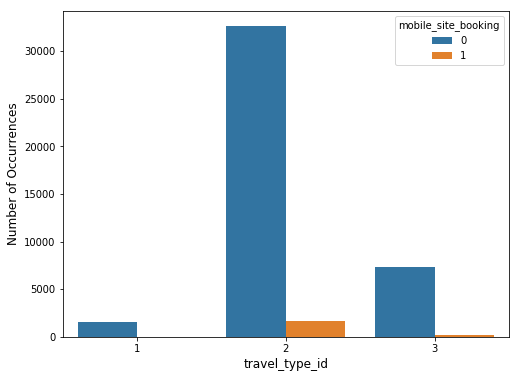

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(x='travel_type_id', hue='mobile_site_booking', data=data)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('travel_type_id', fontsize=12)
plt.show()

In [18]:
from datetime import datetime,date
data["from_date"] = pd.to_datetime(data["from_date"])

data['month'] = data.from_date.apply(lambda x: x.month)
data['week'] = data.from_date.apply(lambda x: x.week)
data['day'] = data.from_date.apply(lambda x: x.day)
data['hour'] = data.from_date.apply(lambda x: x.hour)
data['minute'] = data.from_date.apply(lambda x: x.minute)
data['dayofweek'] = data.from_date.apply(lambda x: x.dayofweek)
data['quarter'] = data.from_date.apply(lambda x: x.quarter)
data['weekofyear'] = data.from_date.apply(lambda x: x.weekofyear)
data['dayofyear'] = data.from_date.apply(lambda x: x.dayofyear)
data['second'] = data.from_date.apply(lambda x: x.second)

In [19]:
data.head()

,id,user_id,vehicle_model_id,travel_type_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,month,week,day,hour,minute,dayofweek,quarter,weekofyear,dayofyear,second
0,132512,22177,28,2,83.0,448.0,2013-01-01 02:00:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1,1,1,2,0,1,1,1,1,0
1,132513,21413,12,2,1010.0,540.0,2013-01-01 09:00:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1,1,1,9,0,1,1,1,1,0
2,132514,22178,12,2,1301.0,1034.0,2013-01-01 03:30:00,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1,1,1,3,30,1,1,1,1,0
3,132515,13034,12,2,768.0,398.0,2013-01-01 05:45:00,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1,1,1,5,45,1,1,1,1,0
4,132517,22180,12,2,1365.0,849.0,2013-01-01 09:00:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1,1,1,9,0,1,1,1,1,0


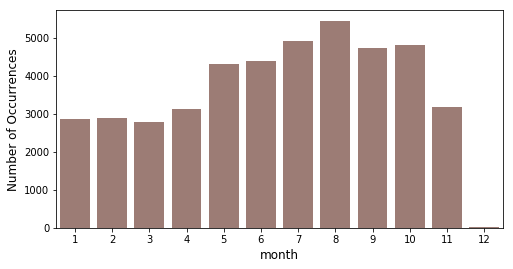

In [20]:
cnt_srs = data['month'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('month', fontsize=12)
plt.show()

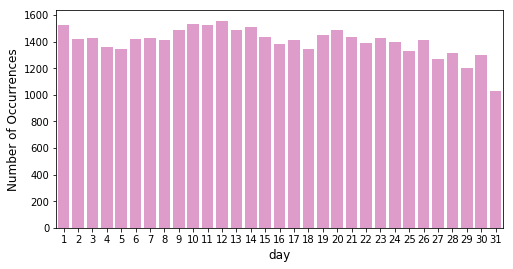

In [21]:
cnt_srs = data['day'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[6])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('day', fontsize=12)
plt.show()

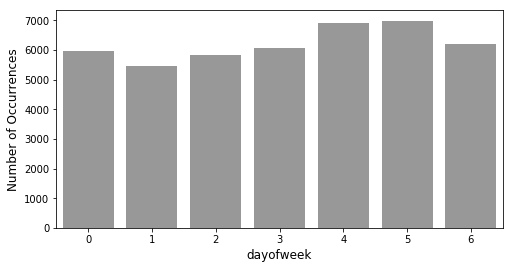

In [22]:
cnt_srs = data['dayofweek'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[7])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('dayofweek', fontsize=12)
plt.show()

### The plot shows that Thursday, Friday and Saturday are the days where the business is at peak and Monday is the dullest. The surprising element to notice is that Wednesday has more customers than Sunday.

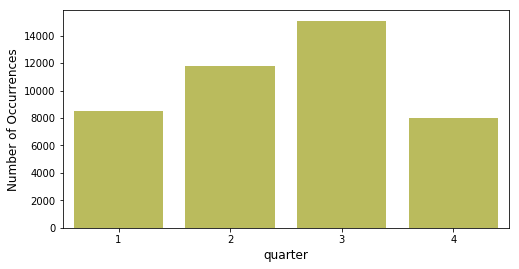

In [23]:
cnt_srs = data['quarter'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[8])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('quarter', fontsize=12)
plt.show()

### Third quarter, Q3: 1 July – 30 September (92 days)
#### The plot shows that in quarter 3 people use maximum taxi rides maybe because of rainy season in bangalore.
##### Primary rainy season in the city is from June to September when Bengaluru receives rain from South-West Monsoon.


In [24]:
data.loc[data.Car_Cancellation == 1,['from_area_id','Car_Cancellation']].groupby('from_area_id').sum().sort_values(by=['Car_Cancellation'], ascending=[False]).reset_index()

,from_area_id,Car_Cancellation
0,571.0,127
1,393.0,116
2,293.0,99
3,83.0,68
4,1010.0,53
5,1096.0,49
6,142.0,43
7,1330.0,41
8,1371.0,39
9,269.0,39


## Here we can clearly see that in area_id ['571', '393'] the car_cancellation is maximum, so driver need to check status of rider first on call every time then go to that location.

In [25]:
data.loc[data.Car_Cancellation == 1,['online_booking','Car_Cancellation']].groupby('online_booking').sum().sort_values(by=['Car_Cancellation'], ascending=[False]).reset_index()

,online_booking,Car_Cancellation
0,1,1903
1,0,1229


In [26]:
data.loc[data.Car_Cancellation == 1,['mobile_site_booking','Car_Cancellation']].groupby('mobile_site_booking').sum().sort_values(by=['Car_Cancellation'], ascending=[False]).reset_index()

,mobile_site_booking,Car_Cancellation
0,0,2843
1,1,289


## This analysis shows that the booking done on desktop website gets cancelled much than the booking done on mobile website. 